Image shape: torch.Size([1, 3, 512, 512])


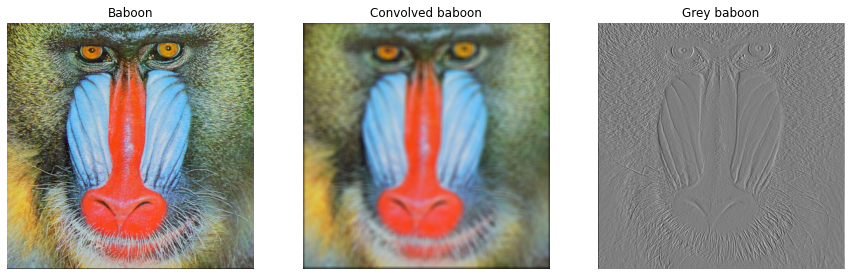

In [4]:
import torch
import torch.nn.functional as F
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
from PIL import Image

image_path = 'baboon.jpg'  
img = Image.open(image_path)

img_tensor = TF.to_tensor(img).unsqueeze(0)  
n, c, w, h = img_tensor.shape
print(f'Image shape: {img_tensor.shape}') 

ks = 10
kernel_block = (1 / ks**2) * torch.ones((ks, ks)) 
kernel_block = kernel_block.unsqueeze(0).unsqueeze(0) 

kernel_rgb = kernel_block.repeat(3, 1, 1, 1)  

#conv F.conv2d
conv_image_rgb = F.conv2d(img_tensor, kernel_rgb, padding=ks//2, groups=3)

# gray image
img_gray = TF.rgb_to_grayscale(img)
img_gray_tensor = TF.to_tensor(img_gray).unsqueeze(0)

#our custom kernel
deriv_kernel = torch.tensor([
    [0.0, 0.0, 0.0],
    [1.0, 0.0, -1.0],
    [0.0, 0.0, 0.0]
]).unsqueeze(0).unsqueeze(0) * 0.5  

conv_image_gray = F.conv2d(img_gray_tensor, deriv_kernel, padding=1)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#given image
axs[0].imshow(TF.to_pil_image(img_tensor.squeeze(0)))
axs[0].set_title('Baboon')

#convolved image 
axs[1].imshow(conv_img_rgb_plot.detach().numpy())
axs[1].set_title('Convolved baboon')

#gray image
axs[2].imshow(conv_image_gray.squeeze(0).squeeze(0).detach().numpy(), cmap='gray')
axs[2].set_title('Grey baboon')

# Hide axes
for ax in axs:
    ax.axis('off')

plt.show()
